In [1]:
import pandas as pd

# 读取csv文件
df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')

# 提取所需列的值
patient_ids = df['patient_id'].tolist()
image_ids = df['image_id'].tolist()
cancer = df['cancer'].tolist()

# 打印出提取的值
print(len(patient_ids))
print(len(image_ids))
print(len(cancer))

54706
54706
54706


In [2]:
counts = df['cancer'].value_counts()

In [3]:
counts

0    53548
1     1158
Name: cancer, dtype: int64

- cancer - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.（0为正常，1为癌症）

In [5]:
!mkdir label0
!mkdir label1

import shutil
from tqdm import tqdm
c0 = 0
c1 = 0
for i in tqdm(range(len(patient_ids))):
    if cancer[i]==0:
        c0 = c0+1
        file_name = str(patient_ids[i])+'_'+str(image_ids[i])+'.png'
        shutil.copy('/kaggle/input/rsna-breast-cancer-512-pngs/' + file_name, './label0/' + '/' + file_name)
    if cancer[i]==1:
        c1 = c1+1
        file_name = str(patient_ids[i])+'_'+str(image_ids[i])+'.png'
        shutil.copy('/kaggle/input/rsna-breast-cancer-512-pngs/' + file_name, './label1/' + '/' + file_name)

mkdir: cannot create directory ‘label0’: File exists
mkdir: cannot create directory ‘label1’: File exists


100%|██████████| 54706/54706 [08:24<00:00, 108.48it/s]


In [6]:
c1

1158

In [7]:
c0

53548

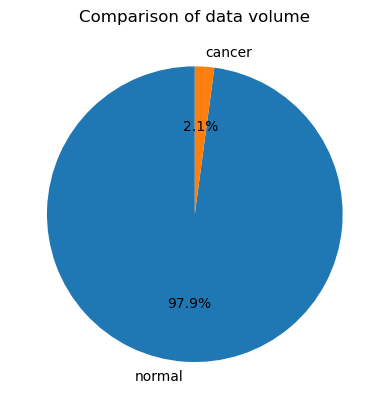

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# 创建数据
sizes = [c0, c1]
labels = ['normal', 'cancer']

# 绘制圆形图
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# 添加标题
plt.title('Comparison of data volume')

# 显示图形
plt.show()

In [23]:
!rm -rf label1